## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
!pip install keras

import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

    100% |████████████████████████████████| 378kB 40.7MB/s ta 0:00:01
You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape[-1]

3072

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512,activation='relu')(input_layer)
    x = keras.layers.Dense(units=256,activation='relu')(x)
    x = keras.layers.Dense(units=128,activation='relu')(x)
    out = keras.layers.Dense(units=10,activation='softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer],outputs = [out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
"""
Compile 模型
"""

model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer = optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.9559 - accuracy: 0.2949 - val_loss: 1.7813 - val_accuracy: 0.3734
Epoch 2/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.7291 - accuracy: 0.3831 - val_loss: 1.6729 - val_accuracy: 0.4032
Epoch 3/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6337 - accuracy: 0.4145 - val_loss: 1.6180 - val_accuracy: 0.4274
Epoch 4/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5586 - accuracy: 0.4434 - val_loss: 1.5489 - val_accuracy: 0.4479
Epoch 5/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5119 - accuracy: 0.4598 - val_loss: 1.4932 - val_accuracy: 0.4683
Epoch 6/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4823 - accuracy: 0.4719 - val_loss: 1.4949 - val_accuracy: 0.4703
Epoch 7/500
50

50000/50000 [==============================] - 3s 62us/step - loss: 0.5895 - accuracy: 0.7898 - val_loss: 1.9280 - val_accuracy: 0.5178
Epoch 55/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5768 - accuracy: 0.7934 - val_loss: 1.9728 - val_accuracy: 0.5098
Epoch 56/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5530 - accuracy: 0.8041 - val_loss: 2.0280 - val_accuracy: 0.5076
Epoch 57/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5709 - accuracy: 0.7951 - val_loss: 1.9564 - val_accuracy: 0.5080
Epoch 58/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5459 - accuracy: 0.8055 - val_loss: 2.0585 - val_accuracy: 0.5059
Epoch 59/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5256 - accuracy: 0.8117 - val_loss: 2.0719 - val_accuracy: 0.5118
Epoch 60/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5202 - accuracy: 0.8147 - val_loss: 

50000/50000 [==============================] - 3s 62us/step - loss: 0.2326 - accuracy: 0.9171 - val_loss: 3.3141 - val_accuracy: 0.4998
Epoch 110/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2483 - accuracy: 0.9123 - val_loss: 3.3349 - val_accuracy: 0.4953
Epoch 111/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2565 - accuracy: 0.9085 - val_loss: 3.3135 - val_accuracy: 0.4987
Epoch 112/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.2761 - accuracy: 0.9010 - val_loss: 3.3538 - val_accuracy: 0.4975
Epoch 113/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2560 - accuracy: 0.9080 - val_loss: 3.2676 - val_accuracy: 0.4968
Epoch 114/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.2462 - accuracy: 0.9106 - val_loss: 3.3527 - val_accuracy: 0.4971
Epoch 115/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2023 - accuracy: 0.9277 - val_

Epoch 164/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2093 - accuracy: 0.9269 - val_loss: 4.0241 - val_accuracy: 0.4955
Epoch 165/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1481 - accuracy: 0.9476 - val_loss: 4.1382 - val_accuracy: 0.4983
Epoch 166/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1095 - accuracy: 0.9616 - val_loss: 4.1144 - val_accuracy: 0.4948
Epoch 167/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1933 - accuracy: 0.9342 - val_loss: 4.2498 - val_accuracy: 0.4838
Epoch 168/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2328 - accuracy: 0.9200 - val_loss: 4.1960 - val_accuracy: 0.4867
Epoch 169/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1659 - accuracy: 0.9413 - val_loss: 4.2580 - val_accuracy: 0.4939
Epoch 170/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1574 - accuracy:

50000/50000 [==============================] - 3s 62us/step - loss: 0.0781 - accuracy: 0.9729 - val_loss: 4.5634 - val_accuracy: 0.4930
Epoch 219/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1079 - accuracy: 0.9623 - val_loss: 4.5787 - val_accuracy: 0.4923
Epoch 220/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1591 - accuracy: 0.9465 - val_loss: 4.5671 - val_accuracy: 0.4893
Epoch 221/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2239 - accuracy: 0.9274 - val_loss: 4.5820 - val_accuracy: 0.4940
Epoch 222/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1110 - accuracy: 0.9614 - val_loss: 4.5063 - val_accuracy: 0.4988
Epoch 223/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0857 - accuracy: 0.9704 - val_loss: 4.4995 - val_accuracy: 0.4952
Epoch 224/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1369 - accuracy: 0.9532 - val_

Epoch 273/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1003 - accuracy: 0.9659 - val_loss: 4.8423 - val_accuracy: 0.4877
Epoch 274/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1356 - accuracy: 0.9535 - val_loss: 4.7798 - val_accuracy: 0.4978
Epoch 275/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1054 - accuracy: 0.9644 - val_loss: 4.7832 - val_accuracy: 0.4956
Epoch 276/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0955 - accuracy: 0.9676 - val_loss: 4.7878 - val_accuracy: 0.4979
Epoch 277/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1553 - accuracy: 0.9483 - val_loss: 4.7721 - val_accuracy: 0.4979
Epoch 278/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 4.7773 - val_accuracy: 0.4918
Epoch 279/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1171 - accuracy:

50000/50000 [==============================] - 3s 63us/step - loss: 0.1519 - accuracy: 0.9515 - val_loss: 4.9539 - val_accuracy: 0.4875
Epoch 328/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1314 - accuracy: 0.9571 - val_loss: 5.0294 - val_accuracy: 0.4923
Epoch 329/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0979 - accuracy: 0.9664 - val_loss: 5.0952 - val_accuracy: 0.4894
Epoch 330/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0627 - accuracy: 0.9787 - val_loss: 5.0060 - val_accuracy: 0.4936
Epoch 331/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0492 - accuracy: 0.9834 - val_loss: 4.9659 - val_accuracy: 0.5052
Epoch 332/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 4.9725 - val_accuracy: 0.4987
Epoch 333/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0730 - accuracy: 0.9758 - val_

Epoch 382/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0617 - accuracy: 0.9798 - val_loss: 5.1811 - val_accuracy: 0.4961
Epoch 383/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0606 - accuracy: 0.9800 - val_loss: 5.2074 - val_accuracy: 0.4833
Epoch 384/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1731 - accuracy: 0.9489 - val_loss: 5.0917 - val_accuracy: 0.4909
Epoch 385/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1629 - accuracy: 0.9509 - val_loss: 5.1499 - val_accuracy: 0.4907
Epoch 386/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0719 - accuracy: 0.9763 - val_loss: 5.0940 - val_accuracy: 0.4942
Epoch 387/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 5.1541 - val_accuracy: 0.4968
Epoch 388/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0317 - accuracy:

50000/50000 [==============================] - 3s 64us/step - loss: 0.0752 - accuracy: 0.9753 - val_loss: 5.2770 - val_accuracy: 0.4968
Epoch 437/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0789 - accuracy: 0.9743 - val_loss: 5.2690 - val_accuracy: 0.4939
Epoch 438/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 5.3302 - val_accuracy: 0.4988
Epoch 439/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0660 - accuracy: 0.9782 - val_loss: 5.3083 - val_accuracy: 0.4865
Epoch 440/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1233 - accuracy: 0.9613 - val_loss: 5.1912 - val_accuracy: 0.4889
Epoch 441/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0583 - accuracy: 0.9809 - val_loss: 5.2576 - val_accuracy: 0.4933
Epoch 442/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0509 - accuracy: 0.9825 - val_

Epoch 491/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1914 - accuracy: 0.9459 - val_loss: 5.2044 - val_accuracy: 0.4928
Epoch 492/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0694 - accuracy: 0.9776 - val_loss: 5.2447 - val_accuracy: 0.4957
Epoch 493/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 5.2632 - val_accuracy: 0.4943
Epoch 494/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 5.2848 - val_accuracy: 0.4991
Epoch 495/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0723 - accuracy: 0.9767 - val_loss: 5.3846 - val_accuracy: 0.4846
Epoch 496/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1198 - accuracy: 0.9617 - val_loss: 5.2624 - val_accuracy: 0.4943
Epoch 497/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1171 - accuracy:

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


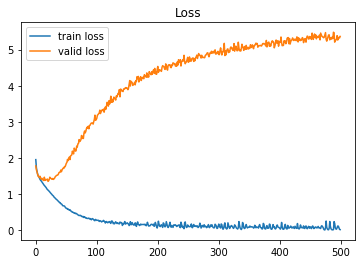

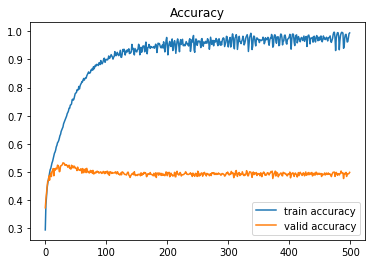

In [17]:
!pip install matplotlib
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [18]:
"""
Compile 模型
"""

model.summary()

optimizer = keras.optimizers.sgd(lr=0.05)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer = optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 300, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 3s 59us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 5.3437 - val_accuracy: 0.5016
Epoch 2/300
50000/50000 [==============================] - 3s 55us/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 5.3373 - val_accuracy: 0.5025
Epoch 3/300
50000/50000 [==============================] - 3s 55us/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 5.3568 - val_accuracy: 0.5027
Epoch 4/300
50000/50000 [==============================] - 3s 55us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.3631 - val_accuracy: 0.5013
Epoch 5/300
50000/50000 [==============================] - 3s 55us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.3768 - val_accuracy: 0.5013
Epoch 6/300
50000/50000 [==============================] - 3s 55us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.3875 - val_accuracy: 0.5033
Epoch 7/300
50000/50000 [==============================] - 3s 

50000/50000 [==============================] - 3s 54us/step - loss: 3.9107e-04 - accuracy: 1.0000 - val_loss: 5.6213 - val_accuracy: 0.5033
Epoch 55/300
50000/50000 [==============================] - 3s 54us/step - loss: 3.8539e-04 - accuracy: 1.0000 - val_loss: 5.6252 - val_accuracy: 0.5032
Epoch 56/300
50000/50000 [==============================] - 3s 54us/step - loss: 3.7961e-04 - accuracy: 1.0000 - val_loss: 5.6274 - val_accuracy: 0.5031
Epoch 57/300
50000/50000 [==============================] - 3s 54us/step - loss: 3.7595e-04 - accuracy: 1.0000 - val_loss: 5.6300 - val_accuracy: 0.5030
Epoch 58/300
50000/50000 [==============================] - 3s 54us/step - loss: 3.6943e-04 - accuracy: 1.0000 - val_loss: 5.6333 - val_accuracy: 0.5036
Epoch 59/300
50000/50000 [==============================] - 3s 54us/step - loss: 3.6508e-04 - accuracy: 1.0000 - val_loss: 5.6380 - val_accuracy: 0.5027
Epoch 60/300
50000/50000 [==============================] - 3s 54us/step - loss: 3.5918e-04 - a

50000/50000 [==============================] - 3s 55us/step - loss: 2.2761e-04 - accuracy: 1.0000 - val_loss: 5.7301 - val_accuracy: 0.5020
Epoch 108/300
50000/50000 [==============================] - 3s 55us/step - loss: 2.2602e-04 - accuracy: 1.0000 - val_loss: 5.7322 - val_accuracy: 0.5015
Epoch 109/300
50000/50000 [==============================] - 3s 55us/step - loss: 2.2445e-04 - accuracy: 1.0000 - val_loss: 5.7333 - val_accuracy: 0.5017
Epoch 110/300
50000/50000 [==============================] - 3s 54us/step - loss: 2.2249e-04 - accuracy: 1.0000 - val_loss: 5.7345 - val_accuracy: 0.5018
Epoch 111/300
50000/50000 [==============================] - 3s 55us/step - loss: 2.2126e-04 - accuracy: 1.0000 - val_loss: 5.7357 - val_accuracy: 0.5021
Epoch 112/300
50000/50000 [==============================] - 3s 54us/step - loss: 2.1914e-04 - accuracy: 1.0000 - val_loss: 5.7375 - val_accuracy: 0.5019
Epoch 113/300
50000/50000 [==============================] - 3s 54us/step - loss: 2.1750e-

50000/50000 [==============================] - 3s 55us/step - loss: 1.6175e-04 - accuracy: 1.0000 - val_loss: 5.7958 - val_accuracy: 0.5029
Epoch 161/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.6092e-04 - accuracy: 1.0000 - val_loss: 5.7976 - val_accuracy: 0.5026
Epoch 162/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.5989e-04 - accuracy: 1.0000 - val_loss: 5.7976 - val_accuracy: 0.5025
Epoch 163/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.5921e-04 - accuracy: 1.0000 - val_loss: 5.7993 - val_accuracy: 0.5023
Epoch 164/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.5821e-04 - accuracy: 1.0000 - val_loss: 5.8003 - val_accuracy: 0.5023
Epoch 165/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.5749e-04 - accuracy: 1.0000 - val_loss: 5.8011 - val_accuracy: 0.5024
Epoch 166/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.5652e-

50000/50000 [==============================] - 3s 55us/step - loss: 1.2569e-04 - accuracy: 1.0000 - val_loss: 5.8430 - val_accuracy: 0.5024
Epoch 214/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.2518e-04 - accuracy: 1.0000 - val_loss: 5.8436 - val_accuracy: 0.5023
Epoch 215/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.2462e-04 - accuracy: 1.0000 - val_loss: 5.8445 - val_accuracy: 0.5023
Epoch 216/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.2406e-04 - accuracy: 1.0000 - val_loss: 5.8451 - val_accuracy: 0.5026
Epoch 217/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.2360e-04 - accuracy: 1.0000 - val_loss: 5.8456 - val_accuracy: 0.5025
Epoch 218/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.2305e-04 - accuracy: 1.0000 - val_loss: 5.8464 - val_accuracy: 0.5026
Epoch 219/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.2254e-

50000/50000 [==============================] - 3s 55us/step - loss: 1.0271e-04 - accuracy: 1.0000 - val_loss: 5.8792 - val_accuracy: 0.5019
Epoch 267/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.0236e-04 - accuracy: 1.0000 - val_loss: 5.8795 - val_accuracy: 0.5022
Epoch 268/300
50000/50000 [==============================] - 3s 57us/step - loss: 1.0201e-04 - accuracy: 1.0000 - val_loss: 5.8801 - val_accuracy: 0.5021
Epoch 269/300
50000/50000 [==============================] - 3s 57us/step - loss: 1.0173e-04 - accuracy: 1.0000 - val_loss: 5.8809 - val_accuracy: 0.5023
Epoch 270/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.0136e-04 - accuracy: 1.0000 - val_loss: 5.8813 - val_accuracy: 0.5025
Epoch 271/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.0102e-04 - accuracy: 1.0000 - val_loss: 5.8822 - val_accuracy: 0.5023
Epoch 272/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.0059e-

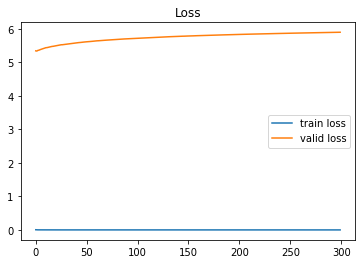

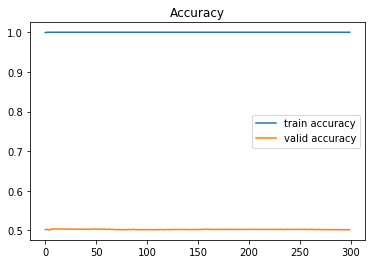

In [21]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [20]:
3+1

4